# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [390]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [224]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [225]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [242]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [243]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [244]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [245]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [246]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [247]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [248]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [249]:
cnn.add(tf.keras.layers.Flatten())

In [250]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [251]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [252]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [253]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [254]:
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_125 (Conv2D)         (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 63, 63, 64)        18496     
                                                                 
 conv2d_127 (Conv2D)         (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                               

In [255]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 274s 124ms/step - loss: 1.3926 - accuracy: 0.5918 - val_loss: 0.4671 - val_accuracy: 0.8499
Epoch 2/10
2197/2197 [==============================] - 268s 122ms/step - loss: 0.5093 - accuracy: 0.8419 - val_loss: 0.3337 - val_accuracy: 0.8961
Epoch 3/10
2197/2197 [==============================] - 269s 122ms/step - loss: 0.3325 - accuracy: 0.8951 - val_loss: 0.2296 - val_accuracy: 0.9272
Epoch 4/10
2197/2197 [==============================] - 278s 127ms/step - loss: 0.2506 - accuracy: 0.9226 - val_loss: 0.2608 - val_accuracy: 0.9266
Epoch 5/10
2197/2197 [==============================] - 274s 125ms/step - loss: 0.1962 - accuracy: 0.9405 - val_loss: 0.2714 - val_accuracy: 0.9191
Epoch 6/10
2197/2197 [==============================] - 268s 122ms/step - loss: 0.1619 - accuracy: 0.9506 - val_loss: 0.2136 - val_accuracy: 0.9352
Epoch 7/10
2197/2197 [==============================] - 272s 124ms/step - loss: 0.1459 - accuracy: 0.9560 - val_

## Evaluating Model

In [266]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 56s 26ms/step - loss: 0.0783 - accuracy: 0.9782
Training accuracy: 0.9781919121742249


In [267]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 25ms/step - loss: 0.2495 - accuracy: 0.9459
Validation accuracy: 0.9458798170089722


### Saving Model

In [269]:
cnn.save('trained_plant_disease_model.keras')

In [272]:
training_history.history #Return Dictionary of history

{'loss': [1.3926340341567993,
  0.5093422532081604,
  0.332528293132782,
  0.25064608454704285,
  0.1961534023284912,
  0.16193240880966187,
  0.14591246843338013,
  0.12622447311878204,
  0.10997208952903748,
  0.10591727495193481],
 'accuracy': [0.5917917490005493,
  0.8418664336204529,
  0.8951276540756226,
  0.9225834012031555,
  0.9405078887939453,
  0.9505512714385986,
  0.9559854865074158,
  0.9632833003997803,
  0.9678924679756165,
  0.9702112674713135],
 'val_loss': [0.4670976996421814,
  0.33370524644851685,
  0.22960424423217773,
  0.2608007490634918,
  0.2714437246322632,
  0.21357299387454987,
  0.20022274553775787,
  0.18895581364631653,
  0.3728276193141937,
  0.24945156276226044],
 'val_accuracy': [0.8498747944831848,
  0.8961415886878967,
  0.9271568655967712,
  0.9266446828842163,
  0.9191327095031738,
  0.9352378845214844,
  0.9422376751899719,
  0.9466765522956848,
  0.9220350384712219,
  0.9458798170089722]}

In [273]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [274]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

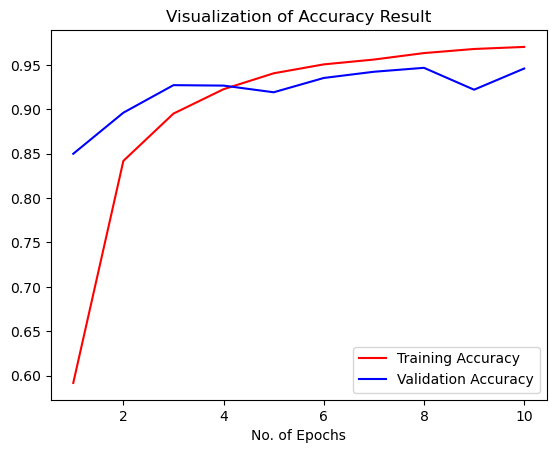

In [278]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [402]:
class_name = validation_set.class_names

In [403]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [404]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 115s 7ms/step


In [405]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [406]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [407]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [408]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [409]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.84      0.91       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.85      0.93      0.89       502
                               Blueberry___healthy       0.85      0.99      0.92       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.89      0.94       421
                 Cherry_(including_sour)___healthy       0.95      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

### Confusion Matrix Visualization

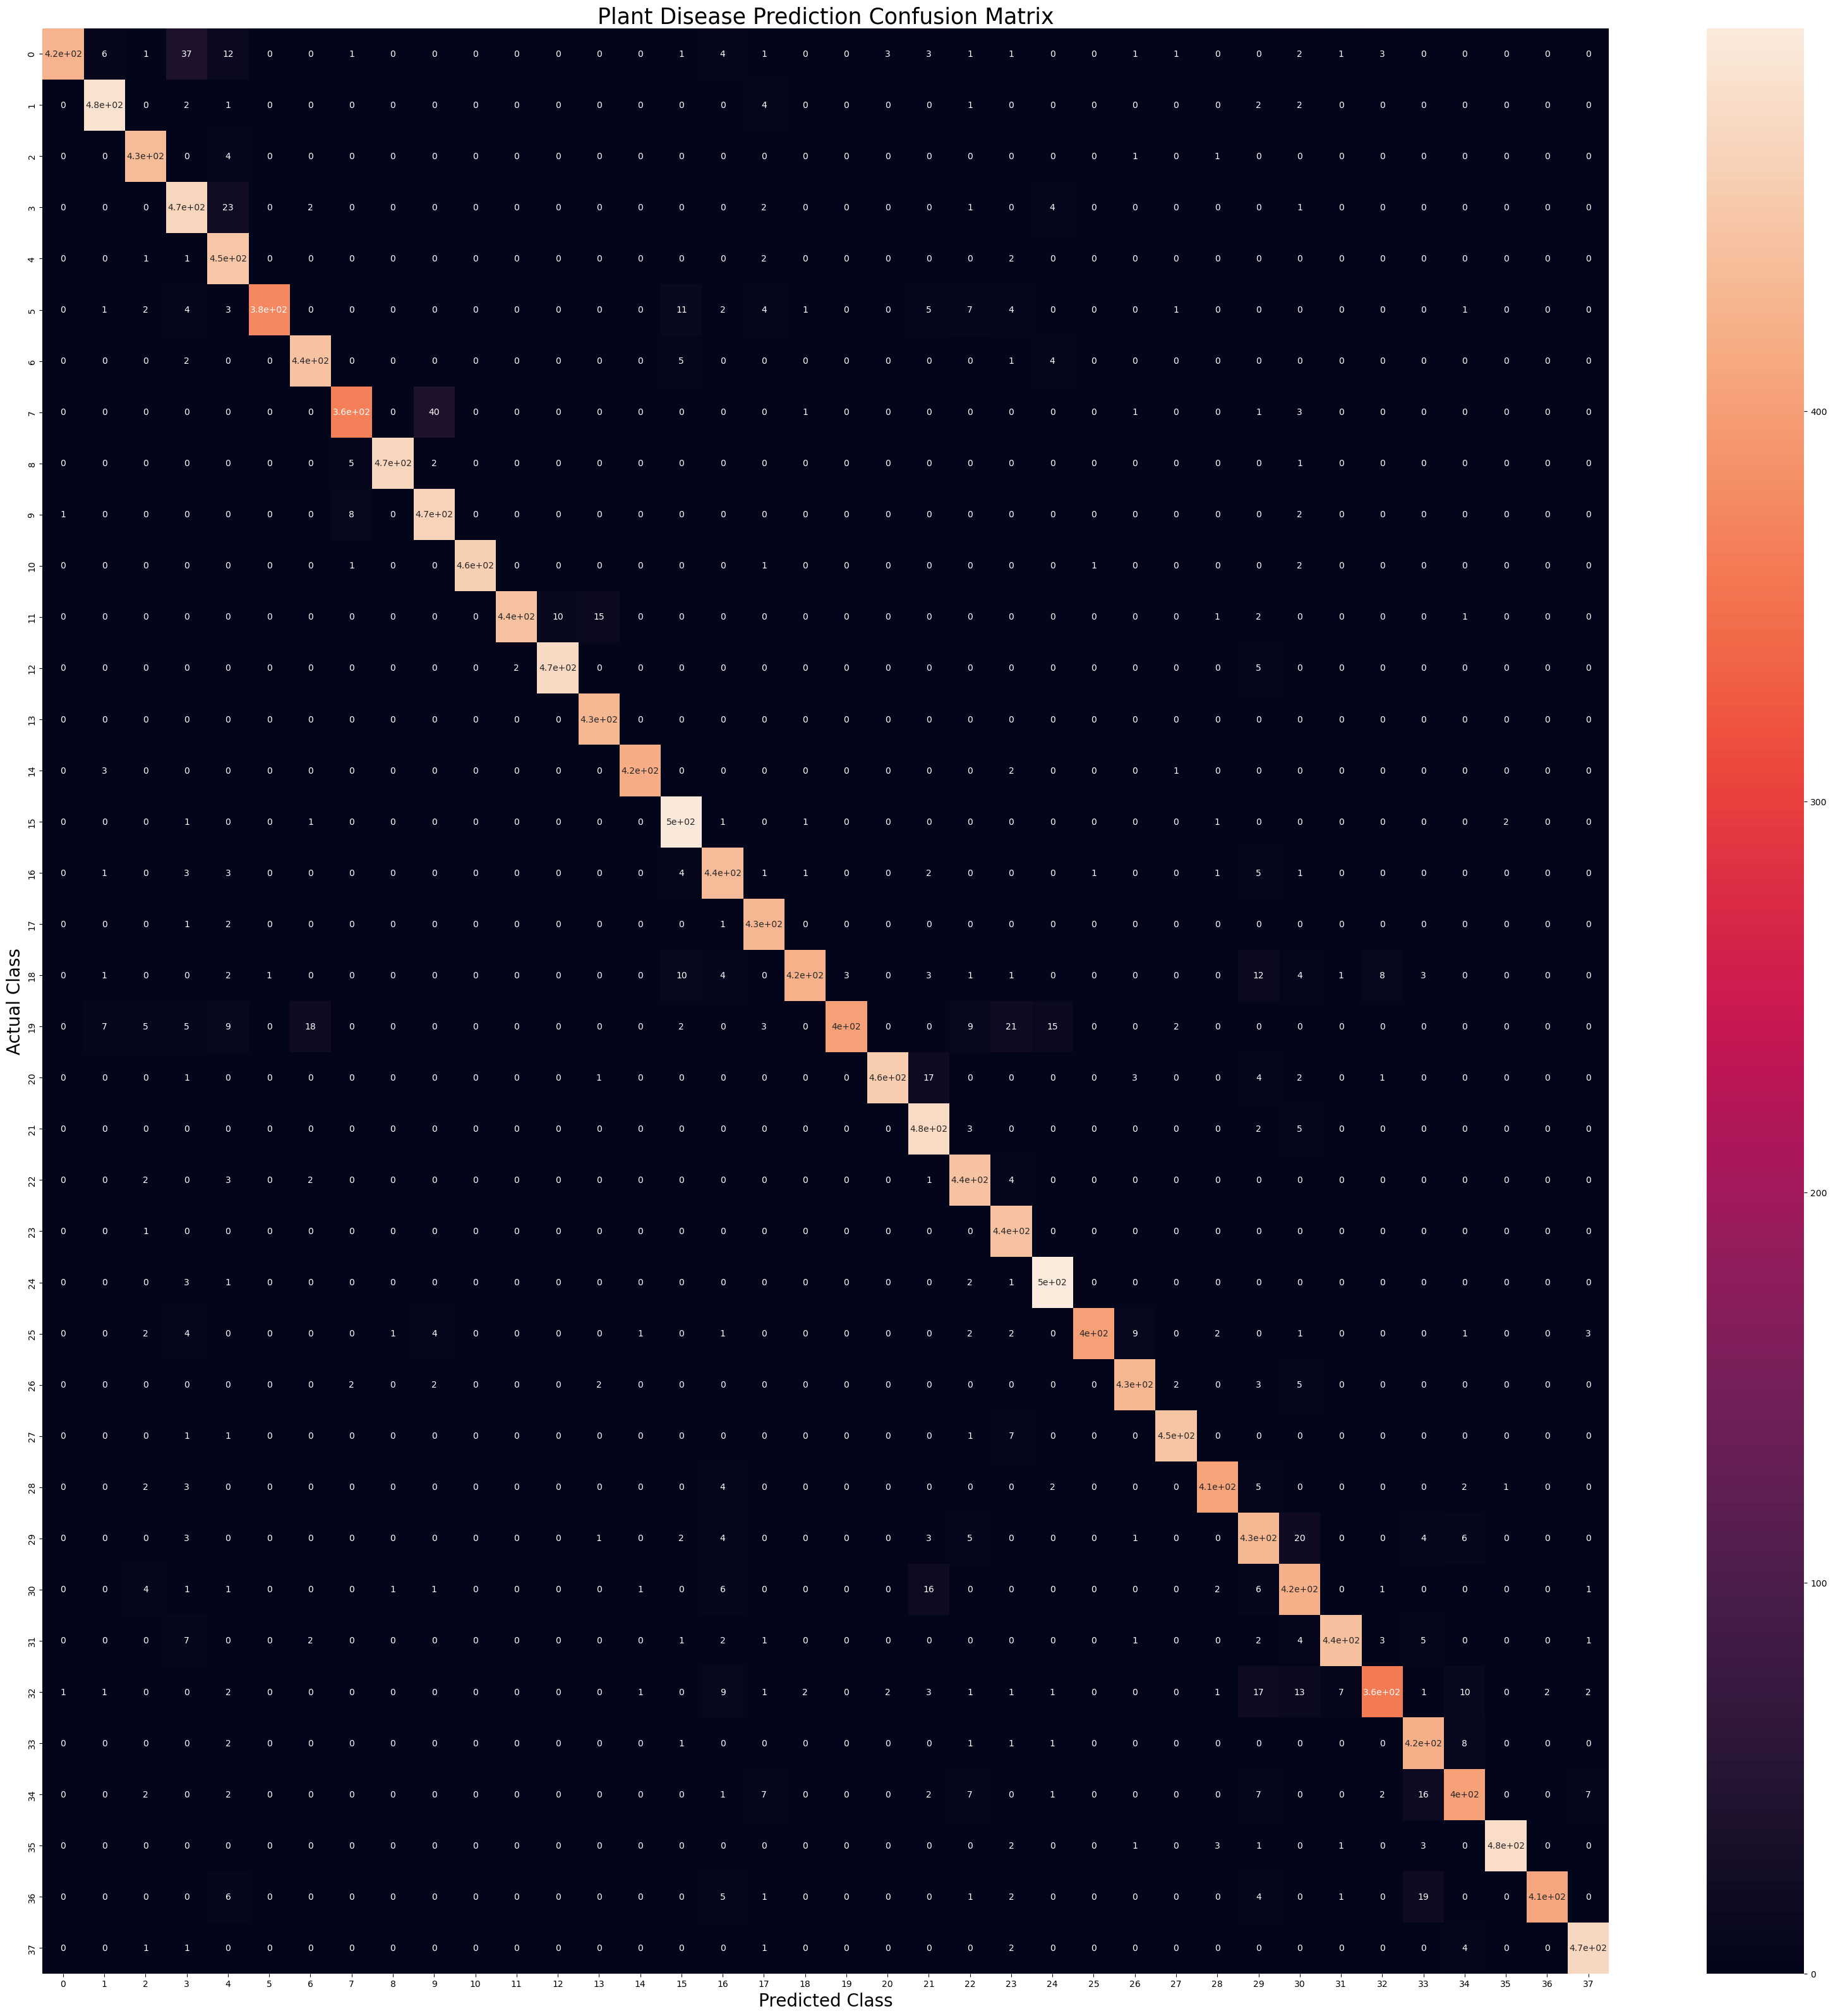

In [410]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()